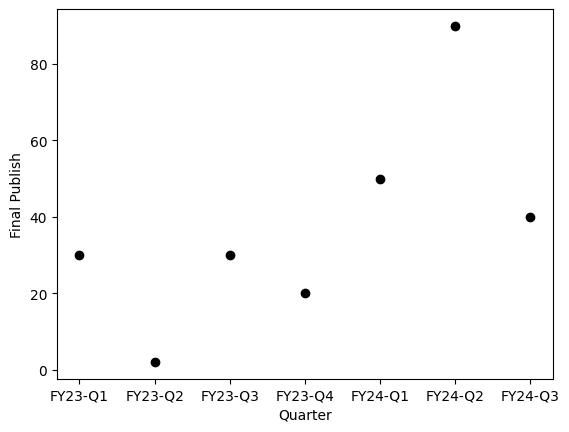

Fitting 3 folds for each of 100 candidates, totalling 300 fits


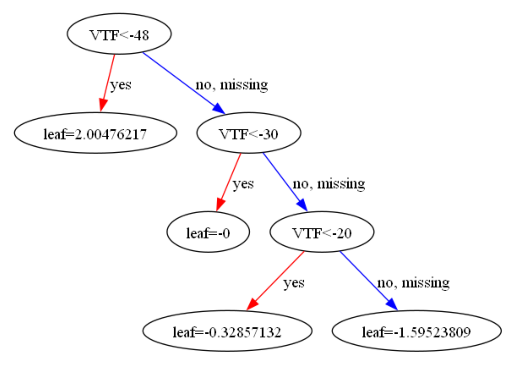

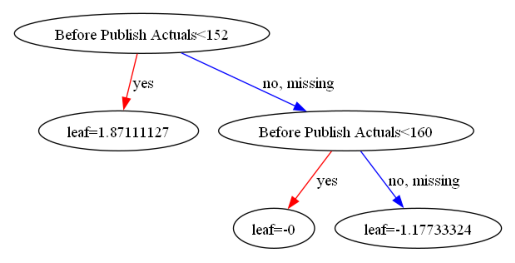

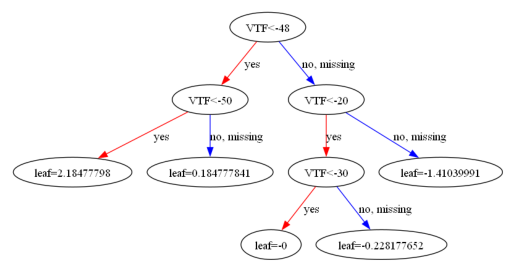

Predicted Final Publish: 19.84196662902832
Best parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.3, 'alpha': 5}


In [5]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# Input historical data
data_history = pd.DataFrame({
    "VTF": [-30, -20, -30, -20, -50, -90, -48],
    "Before Publish Actuals": [200, 180, 160, 160, 150, 150, 152],
    "Publish 1": [2, 14, 3, 5, 6, 8, 9],
    "Final Publish": [30, 2, 30, 20, 50, 90, 40],
    "Time" : ["FY23-Q1", "FY23-Q2", "FY23-Q3", "FY23-Q4", "FY24-Q1", "FY24-Q2", "FY24-Q3"]
})

#make time as index
data_history.set_index('Time', inplace=True)


# Plot the data
plt.figure()
plt.plot(data_history.index, data_history['Final Publish'], 'o', color='black')
plt.xlabel('Quarter')
plt.ylabel('Final Publish')
plt.show()

# Data for prediction
data_to_predict = pd.DataFrame({
    "VTF": [-10],
    "Before Publish Actuals": [200],
    "Publish 1": [5]
})

# Define features and labels
X = data_history[["VTF", "Before Publish Actuals", "Publish 1"]]
y = data_history["Final Publish"]

# Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')



# Hyperparameter grid
param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'alpha': [5, 10, 15],
    'n_estimators': [10, 50, 100]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=100, scoring='neg_mean_squared_error', cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X, y)



# Best estimator
best_xgb_model = random_search.best_estimator_
plot_tree(best_xgb_model,num_trees=0, rankdir='TB')
plot_tree(best_xgb_model,num_trees=1, rankdir='TB')
plot_tree(best_xgb_model,num_trees=2, rankdir='TB') # `num_trees` is used to specify which tree you want to plot
  # Adjust the figure size as necessary
plt.show()
# Predict the 'Final Publish' for the new data
final_publish_prediction = best_xgb_model.predict(data_to_predict)

# Output the prediction and best parameters
print(f"Predicted Final Publish: {final_publish_prediction[0]}")
print(f"Best parameters: {random_search.best_params_}")

In [17]:
best_xgb_model.n_estimators

100

Predicted Final Publish: 19.84196662902832
Best parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.3, 'alpha': 5}


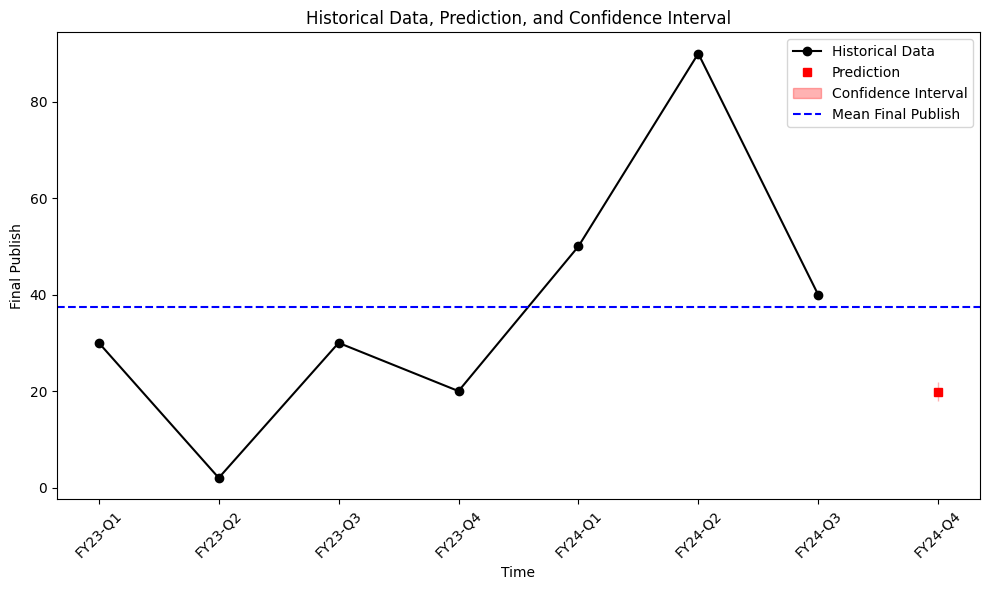

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

# Your data loading and model training code here

# Best estimator has been found
best_xgb_model = random_search.best_estimator_

# Predict the 'Final Publish' for the new data
final_publish_prediction = best_xgb_model.predict(data_to_predict)

# Print the prediction and best parameters
print(f"Predicted Final Publish: {final_publish_prediction[0]}")
print(f"Best parameters: {random_search.best_params_}")

# Calculate the mean of the 'Final Publish' historical data
mean_final_publish = data_history['Final Publish'].mean()

# Simplified assumption for confidence interval (e.g., ±10% of the prediction)
confidence_interval = [final_publish_prediction[0] * 0.9, final_publish_prediction[0] * 1.1]

# Plotting
plt.figure(figsize=(10, 6))
# Historical data
plt.plot(data_history.index, data_history['Final Publish'], 'o-', color='black', label='Historical Data')
# Prediction
predicted_time = "FY24-Q4"
plt.plot(predicted_time, final_publish_prediction[0], 's', color='red', label='Prediction')
# Confidence interval for the prediction
plt.fill_between([predicted_time], confidence_interval[0], confidence_interval[1], color='red', alpha=0.3, label='Confidence Interval')
# Mean of 'Final Publish' as a horizontal line
plt.axhline(y=mean_final_publish, color='blue', linestyle='--', label='Mean Final Publish')

# Enhancements
plt.xlabel('Time')
plt.ylabel('Final Publish')
plt.xticks(rotation=45)
plt.title('Historical Data, Prediction, and Confidence Interval')
plt.legend()
plt.tight_layout()
plt.show()


NotFittedError: need to call fit or load_model beforehand

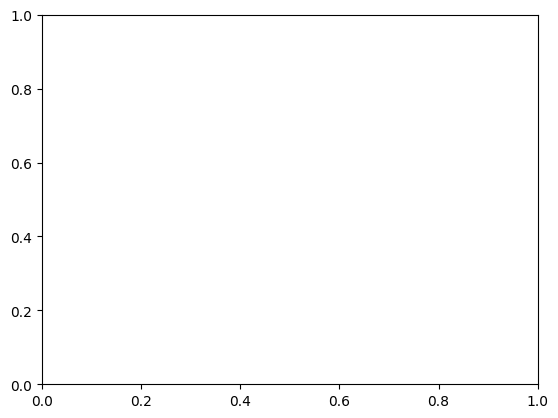

In [3]:


# Plot the first tree
plot_tree(xgb_model, num_trees=0, rankdir='LR')  # 'LR' = horizontal tree
plt.show()

# To save the tree as a file (e.g., PNG)
plot_tree(xgb_model, num_trees=0, rankdir='LR')
